<a href="https://colab.research.google.com/github/keinam53/Deep_learning/blob/main/3_Klasyfikacja/1_Klasyfikacja_obrazow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Image Recognition 

Celem tego notebook'a jest budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy kolejny popularny zbiór danych w dziedzinie sieci neuronowych: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST to zestaw danych z obrazkami artykułów Zalando - składający się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28 x 28, powiązany z jedną etykietą z 10 klas.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

1. [Import bibliotek](#a0)
2. [Załadowanie danych i wstępna eksploracja](#a1)
3. [Budowa modelu](#a2)
4. [Ocena modelu](#a3)
5. [Predykcja na podstawie modelu](#a4)
6. [Eksploracja predykcji](#a5)
7. [Błędnie sklasyfikowane obrazy](#a6)
8. [Klika możliwości poprawy modeli](#a7)



### <a name='a0'></a> 1. Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()

### <a name='a1'></a> 2. Załadowanie danych i wstępna eksploracja

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [4]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

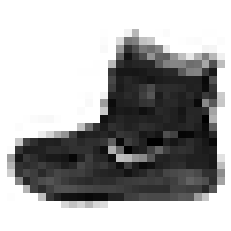

In [5]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

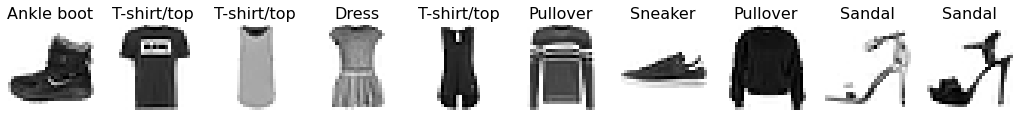

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range (1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [7]:
X_train = X_train / 255
X_test = X_test / 255

### <a name='a2'></a> 3. Budowa modelu

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**epochs** - ile razy zestaw treningowy zostanie przetworzony przez model.
Przy każdej iteracji optymalizator próbuje dopasować wagi, aby 
funkcja celu została zminimalizowana.
 
**batch_size** - liczba przykładów treningowych po której następuje aktualizacji wag

**validation_split** - procent danych użytych do walidacji

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2, verbose=False)

In [10]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.502204,0.822146,0.400069,0.855750,0
1,0.380654,0.861375,0.389129,0.857167,1
2,0.340409,0.874750,0.348165,0.871750,2
3,0.317036,0.882062,0.335478,0.879083,3
4,0.298495,0.889771,0.334084,0.879500,4
5,0.284470,0.893833,0.366410,0.872583,5
6,0.272262,0.898938,0.325341,0.886167,6
7,0.262556,0.900417,0.361278,0.872250,7
8,0.252880,0.905771,0.328298,0.888500,8
9,0.242441,0.910979,0.349569,0.884333,9


### <a name='a3'></a> 4. Ocena modelu

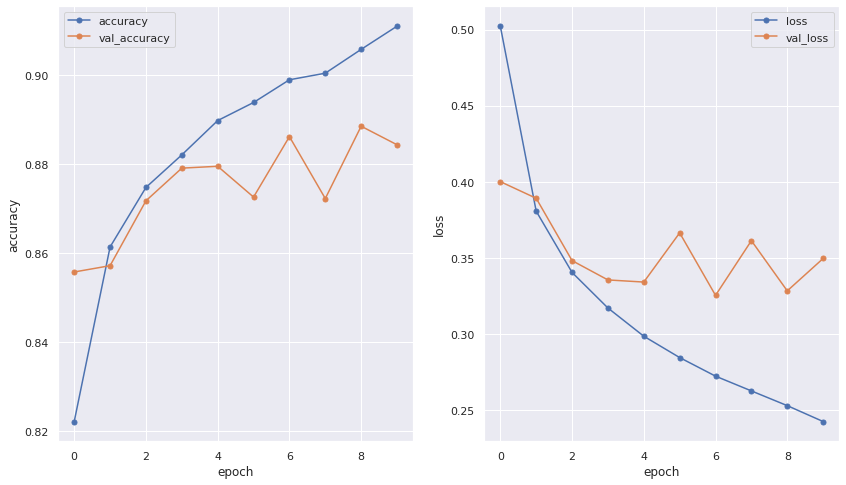

In [19]:
plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.plot(metrics['epoch'], metrics['accuracy'], marker = '.', markersize = 10, label='accuracy')
plt.plot(metrics.index, metrics['val_accuracy'], marker = '.', markersize = 10, label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.plot(metrics['epoch'], metrics['loss'], marker = '.', markersize = 10, label='loss')
plt.plot(metrics.index, metrics['val_loss'], marker = '.', markersize = 10, label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=False)
print(test_acc)
print(f'{test_loss:.3f}')

0.875
0.380


### <a name='a4'></a> 5. Predykcja na podstawie modelu:
* **model.evaluate(y_true, y_pred)** - pozwala obliczyć metryki modelu
* **predictions_cls = np.argmax(predictions, axis=1)** - pozwala zwrócić odpowiednio przewidziane klasy
* **model.predict()** - pozwala zwrócić prawdopodobieństwo danej klasy

In [26]:
predictions = model.predict(X_test)
predictions

array([[0.000004405617, 0.000000017525, 0.000000008819, ..., 0.0852139     , 0.000004022355, 0.97949636    ],
       [0.25394636    , 0.000000000001, 0.999996      , ..., 0.            , 0.00000000019 , 0.000000041294],
       [0.000005263188, 1.            , 0.000000000148, ..., 0.            , 0.000002805329, 0.            ],
       ...,
       [0.00000440808 , 0.000000000006, 0.000000039368, ..., 0.            , 0.79239476    , 0.000000000001],
       [0.000000700017, 0.9999939     , 0.000000000146, ..., 0.            , 0.000008111328, 0.            ],
       [0.000046978734, 0.000000022321, 0.00000060486 , ..., 0.08179936    , 0.0008328259  , 0.002910465   ]], dtype=float32)

In [27]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000004,0.000000,0.000000,0.000000,0.000000,0.007893,0.000063,0.085214,0.000004,0.979496
1,0.253946,0.000000,0.999996,0.000000,0.876956,0.000000,0.968002,0.000000,0.000000,0.000000
2,0.000005,1.000000,0.000000,0.010572,0.000030,0.000000,0.000000,0.000000,0.000003,0.000000
3,0.000003,0.999996,0.000000,0.632120,0.000192,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.979339,0.000000,0.948516,0.049259,0.070794,0.000031,0.994133,0.000000,0.000218,0.000000


In [33]:
predictions_cls = np.argmax(predictions, axis=1)
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

### <a name='a5'></a> 6. Eksploracja predykcji

In [30]:
import plotly.graph_objects as go

In [35]:
#@title Wybierz indeks zdjęcia:
idx = 2513 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v', 
                     marker_color=color))
fig.update_layout(width=800, title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### <a name='a6'></a> 7. Błędnie sklasyfikowane obrazy

In [37]:
#@title Wybierz indeks zdjęcia:

misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 515 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]], 
                     orientation='v', 
                     marker_color='red'))

fig.update_layout(width=800,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### <a name='a7'></a> 8. Klika możliwości poprawy modeli:
* zwiększenie liczby epok
* zwiększenie/zmniejszenie parametrów uczenia, stronjenie hiperparametrów
* zwiększenie/zmniejszenie liczby neuronów wewnątrz wartsw uktytych
* zwiększenie/zmniejszenie parametru **batch_size**, czyli rozmiaru wsadu
* zwiększenie/zmniejszenie liczby warstw ukrytych
* zastosowanie regularyzacji (L1 - lasso, L2 - ridge), warstwy Dropout
